# Explore Lesson
Code Along

import hiku

In [9]:
import pandas as pd
from wrangle import wrangle_grades
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split

In [ ]:
# sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))


In [7]:
df = wrangle_grades()

In [8]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [10]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)
train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

## Continuous and Continuous

In [12]:
train.head()
# goal is to predict final grade based on score of 3 previous exams

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


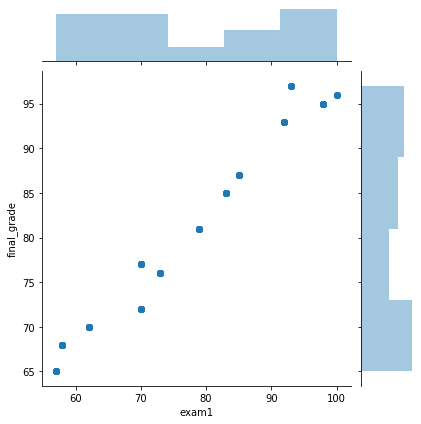

In [14]:
sns.jointplot(x='exam1', y='final_grade', data=train)sns

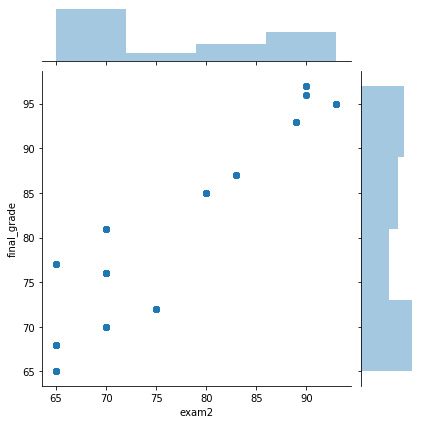

In [15]:
sns.jointplot(x='exam2', y='final_grade', data=train)

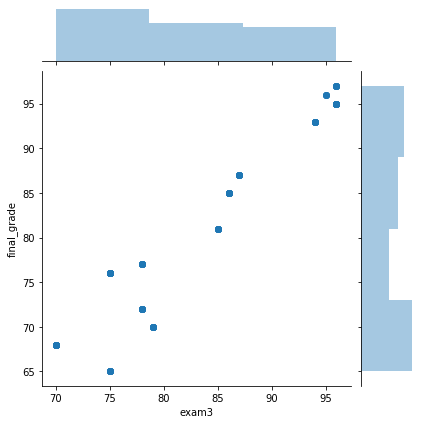

In [16]:
sns.jointplot(x='exam3', y='final_grade', data=train)

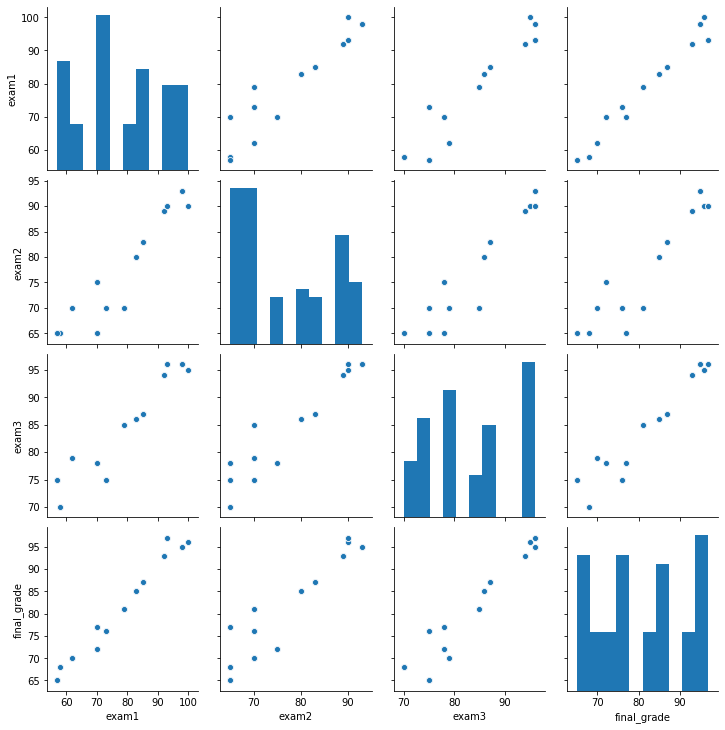

In [17]:
sns.pairplot(train)

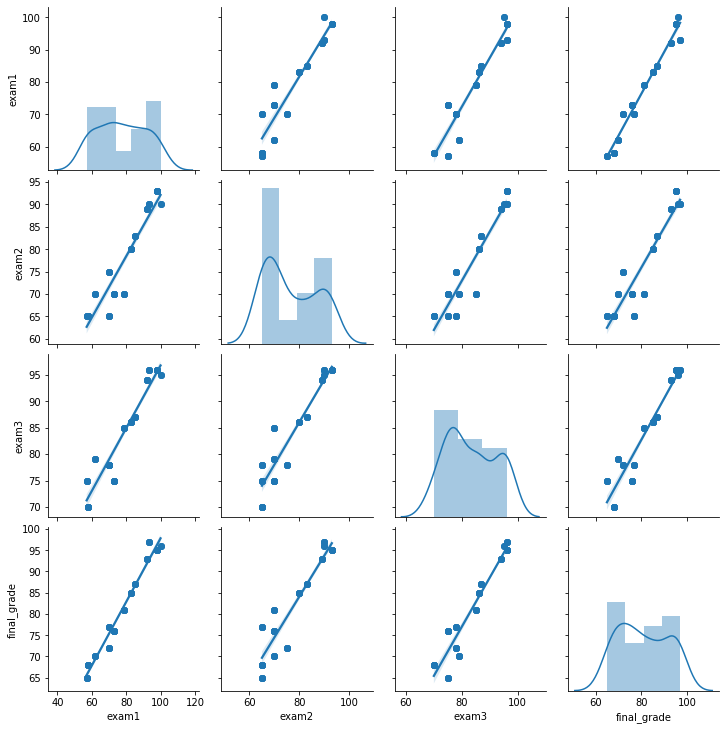

In [28]:
g = sns.PairGrid(train) # basically a pairplot but with customizations
# can specify any two functions we want for visualiztions
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of 2 variables

In [30]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


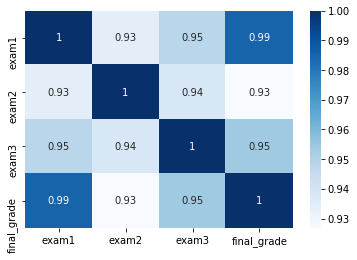

In [31]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways: 

- exam 2 has least correlation with final grade, but is still a strong correlation
- exam 1 has strongest correlation

Questions:
- why does exam 2 have a lower correlation?
    - students are slacking midsemester
    - the material covered on the final isn't the same as what is covered in exam 2
    - the material covered midsemester is harder

## Continuous and Categorical

In [32]:
# turn an exam into a letter grade
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [34]:
pd.cut(train.exam1, bins=[0, 70, 80, 90, 100], labels=['F', 'C', 'B', 'A']).value_counts()

F    32
A    22
C    14
B    13
Name: exam1, dtype: int64

In [35]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 100], labels=['F', 'C', 'B', 'A'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,F


Viz types for continuous x categorical
- boxplot
- bar chart
- violin
- swarplot

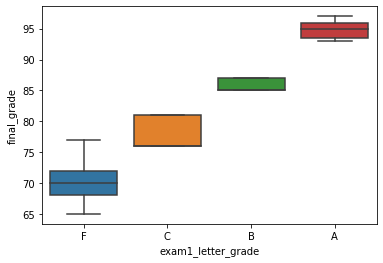

In [37]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Takeaways:
- students with F not only have lowest grade, but also the most variation in grades
    - maybe this is due to different study habits or workflows?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

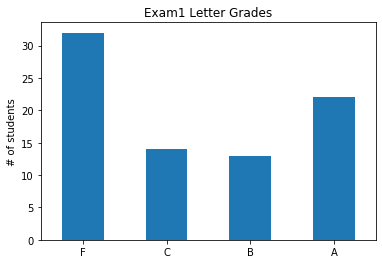

In [44]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of students')
plt.title('Exam1 Letter Grades')
plt.xticks(rotation=0)

In [45]:
# fake some data for demonstration and practice with numpy
# make fake category
np.random.seed(123)
train['classroom'] = np.random.choice(['One', 'Two',], train.shape[0])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
# train.shape[0] in above tells python to give us the same number of results as rows in the train dataframe
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,F,One


(0, 100)

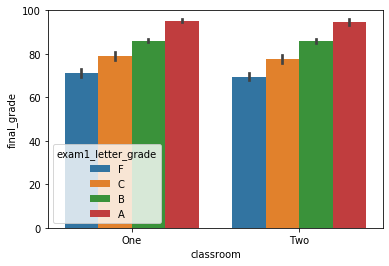

In [49]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0, 100)

(0, 100)

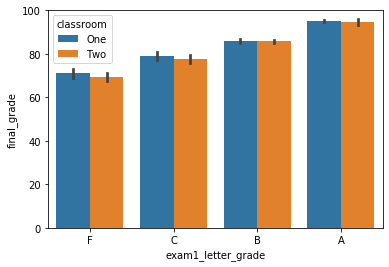

In [50]:
sns.barplot(data=train, y='final_grade', x='exam1_letter_grade', hue='classroom')
plt.ylim(0, 100)

Takeaway: no real difference between classroom 1 and 2   
- so classroom doesn't have an effect on final grade?
- run a hypothesis test to confirm

- $H_0$: there is no difference in final grade between classroom 1 and classroom 2
- $H_0$: there is a difference in final grade between classroom 1 and classroom 2

In [51]:
alpha = .05
from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade, 
    equal_var=False,
)

Ttest_indResult(statistic=2.280491002945514, pvalue=0.025327198363860267)

with a p = .025, so we reject the null hypothesis   

p-value = P(observe our data due to chance | Ho=True)   

results suggest that with random seed 123 we are seeing this result due to chance.  

with a random seed 125 p=.25   
if get unexpected result probably want to double check by varying the random seed

REMEMBER: statistical significance is not business significance

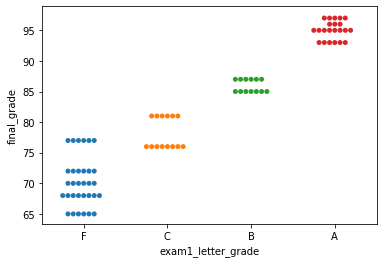

In [53]:
# swarmplot shows how many data points fall within a given category
# doesn't work well for extremely large datasets, computationally expensive
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

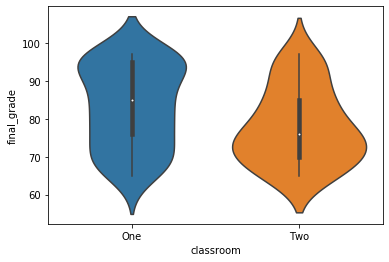

In [54]:
sns.violinplot(data=train, y='final_grade', x='classroom')

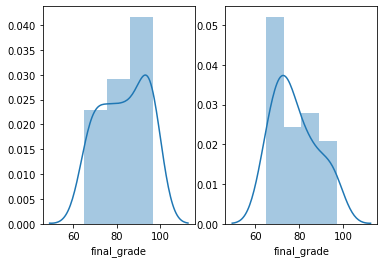

In [55]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)


## Categorical and Categorical

In [56]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,F,One


In [61]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
F,19.8%,19.8%
C,6.2%,11.1%
B,9.9%,6.2%
A,19.8%,7.4%


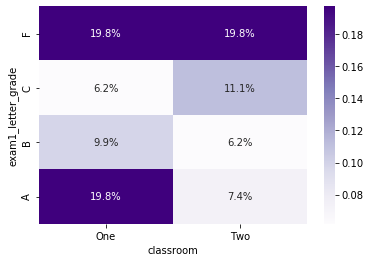

In [64]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [68]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns')
# columns sum to 1

exam1_letter_grade,F,C,B,A
classroom,,,,
One,0.5,0.357143,0.615385,0.727273
Two,0.5,0.642857,0.384615,0.272727


In [70]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='index')
# rows sum to 1

exam1_letter_grade,F,C,B,A
classroom,,,,
One,0.355556,0.111111,0.177778,0.355556
Two,0.444444,0.250000,0.138889,0.166667


# Exercises

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. 

For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.